In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (20, 10)

# RETRIEVING AND BASIC FORMATTING EXCEL FILES

## Retrieving the .xlsx files
Find the directory where the excel files are living. 

Then **'excel_files'** will report what lives inside the folder. 

Note: Any additional excel files you want analysed will need to be put into the same location as **'directory'.**

In [3]:
directory = r"\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content\X_Data\Data - ARR\_CONSOLIDATED v2"
files = os.listdir(directory)
excel_files = []
for f in files:
    if ".xlsx" in f:
        excel_files.append(f)
excel_files

['20170429 9_28 Family Types Log.xlsx',
 '20170429 9_28 FamilyCategory Log.xlsx',
 '20170429 9_28 FamilySubCategory Log.xlsx',
 '20170429 9_28 Host Families Log.xlsx',
 '20170429 9_28 Nested Families Log.xlsx',
 '20170429 9_28 OmniClass Log.xlsx',
 '20170429 9_28 Parameters Log.xlsx',
 '20170429 9_28 ParameterValuesByTypes Log.xlsx',
 '20170429 9_28 Reference Planes Log.xlsx',
 '20170429 9_28 Units Log.xlsx',
 '20170501 6_28 Materials Log.xlsx',
 '~$20170429 9_28 ParameterValuesByTypes Log.xlsx']

## xlsx. key and values

Use <b>keys</b> to pair each key with each excel file in <b>excel_files</b>. This is so that you don't have to type the long file name everytime you need to call it in the rest of the code. 

<b>file_dict</b> will tell you which excel file is paired with each key.

In [4]:
keys = [
        "FamilyTypes",
        "FamilyCategory",
        "FamilySubCategory",
        "HostFamilies",
        "NestedFamilies",
        "OmniClass",
        "Parameters",
        "ParameterValuesByTypes",
        "ReferencePlanes",
        "Units",
        "Materials"
       ]

file_dict = {key: value for (key, value) in zip(keys, excel_files)}
file_dict

{'FamilyCategory': '20170429 9_28 FamilyCategory Log.xlsx',
 'FamilySubCategory': '20170429 9_28 FamilySubCategory Log.xlsx',
 'FamilyTypes': '20170429 9_28 Family Types Log.xlsx',
 'HostFamilies': '20170429 9_28 Host Families Log.xlsx',
 'Materials': '20170501 6_28 Materials Log.xlsx',
 'NestedFamilies': '20170429 9_28 Nested Families Log.xlsx',
 'OmniClass': '20170429 9_28 OmniClass Log.xlsx',
 'ParameterValuesByTypes': '20170429 9_28 ParameterValuesByTypes Log.xlsx',
 'Parameters': '20170429 9_28 Parameters Log.xlsx',
 'ReferencePlanes': '20170429 9_28 Reference Planes Log.xlsx',
 'Units': '20170429 9_28 Units Log.xlsx'}

## FUNCTIONS TO FORMAT EXCEL FILES

### Removing the common file path characters from original family file path name

The example file path below is very long. In order to cut the fat out of the long file path, the common characters from each file path is removed. 

\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content\Windows\Double Hung\Double Hung_3 Panel.rfa

Therefore, the start of the file path <b>\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content</b> is removed in every spreadsheet.

### Removing the rfa. name from FamilyFilePath.

In the excel files, the family name (.rfa) is part of the FamilyFilePath column.

e.g. \\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content\Windows\Special\<u>Window Lancet_basic.rfa</u>

### Determines whether the family is an .rfa or from a .txt catalogue file.

<b> remove_rfaName</b> removes the family name from the FamilyFilePath column. This allows us to find things such as the count of how many families there are within a particular master content folder. It splits the <b>full_filepath</b> path by each \ .

<b>joined_again</b> will join the file path back through the \ except for the last one. The new file path is appended on a FamilyFilePath column.

### Determines whether the family is an .rfa or from a .txt catalogue file.
<b>getFileType</b> removes the last three characters from the FamilyFilePath.

<b>stripFileType</b> removes the last four characters (including the '.') from the FamilyName.

In [5]:
commonPartofFilePath = len(r'\\dc2-file001\Practice\InfoTech\BIM\Revit\RevitStandardsMasterBVN\02_BVN_Library\Master Content')
print commonPartofFilePath
def stripCommonPath(row):
        return row.FamilyFilePath[commonPartofFilePath+1:]
    
def remove_rfaName(row):
    full_filepath = row.FamilyFilePath
    split = full_filepath.split("\\")[:-1]
    joined_again = ("\\".join(split))
    return  joined_again

def getFileType(row):
    return row.FamilyFilePath[-3:]

def stripFileType(row):
    return row.FamilyName[:-4]

95


# FAMILY TYPES

<b>ft</b> and <b>ft_path</b> reads from the Family Types excel file.

In [6]:
ft_path = os.path.join(directory, file_dict["FamilyTypes"])
ft = pd.read_excel(ft_path)

ft["fileType"] = ft.apply(getFileType, axis=1)
ft["FamilyName"] = ft.apply(stripFileType, axis=1)
ft["FamilyFilePath"] = ft.apply(remove_rfaName, axis=1)
ft["FamilyFilePath"] = ft.apply(stripCommonPath, axis=1)

ft.head()

,FamilyFilePath,FamilyName,FamilyTypeName,fileType
0,Windows\Special,Window Round_basic,,rfa
1,Windows\Special,Window Lancet_basic,,rfa
2,Windows\Special,Window Arched Top_basic,,rfa
3,Windows\Special,Skylight_Velux_FCM_WIN,,rfa
4,Windows\Special,Skylight_Operable_WIN,600 x 600mm,rfa


## No. of Family Types

<b>ft_counts</b> will count the number of family types there are for each family.

In [7]:
ft_counts = ft.FamilyName.value_counts()

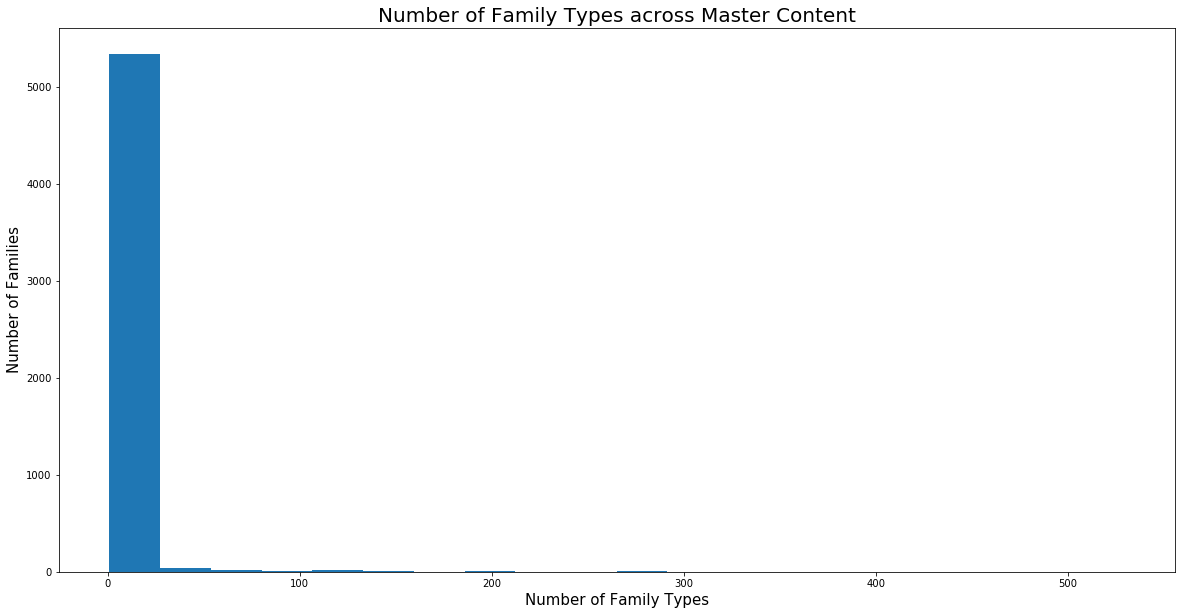

In [8]:
plt.hist(ft_counts, bins=20)
plt.title("Number of Family Types across Master Content", fontsize=20)
plt.xlabel("Number of Family Types", fontsize=15)
plt.ylabel("Number of Families", fontsize=15)
plt.show()

## No. of Family Types (Highest Offenders)

Use <b>cutoff</b> to filter the graph based on the number of families there are in a category.

e.g. cutoff > 50

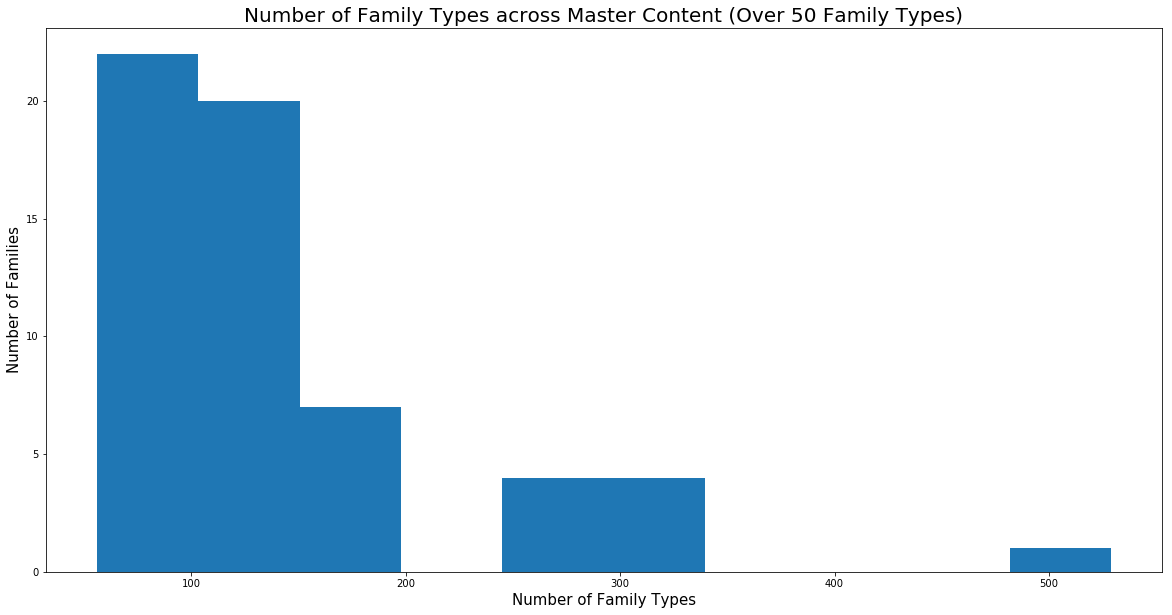

In [9]:
cutoff = 50

plt.hist(ft_counts[ft_counts>cutoff])
plt.title("Number of Family Types across Master Content (Over 50 Family Types)", fontsize=20)
plt.xlabel("Number of Family Types", fontsize=15)
plt.ylabel("Number of Families", fontsize=15)
plt.show()

## Families with 50+ family types

In [10]:
ft_counts[ft_counts>50]

Supply Diffuser_Sidewall                             529
HSS_Hollow Structural Section_Pro                    333
CISC Wide Flange Shapes_Side                         294
CISC Wide Flange Shapes_Section                      294
CISC Wide Flange Shapes_Top                          294
W_Wide Flange                                        274
W_Wide Flange_Pro                                    267
WT_Structural Tee_Pro                                267
WT_Structural Tee                                    267
Table_HermanMiller_DU6ACS_RectangularTable_C_Foot    192
CISC WT Shapes_Top                                   190
CISC WT Shapes_Section                               190
CISC WT Shapes_Side                                  190
Table_HermanMiller_DU6ATS_RectangularTable_T_Foot    180
VAV Outlet Plenum_Wye                                153
VAV Outlet Plenum_Elbow                              153
Louvre_Extruded_200 mm Pitch                         150
Plate                          

## Families with 500+ family types?

The high count of family types means that these families have a Revit catalogue file attached to it. 

The code below differentiates the .txt catalogue files from the .rfa files.

## .rfa vs .txt Family Types 

### Filtering for .txt files

<b>ft_hasTxt</b> filters for family types that are from txt catalog files.

In [11]:
ft_hasTxt = ft[ft.fileType=="txt"]
ft_hasTxt.head()

,FamilyFilePath,FamilyName,FamilyTypeName,fileType
156,Windows\Double Hung,Double Hung_3LT,1816,txt
157,Windows\Double Hung,Double Hung_3LT,1818,txt
158,Windows\Double Hung,Double Hung_3LT,1822,txt
159,Windows\Double Hung,Double Hung_3LT,1824,txt
160,Windows\Double Hung,Double Hung_3LT,1828,txt


### Filtering for .rfa files

<b>ft_noTxt</b> filters for family types that are from within the Revit family.

In [12]:
ft_noTxt = ft[ft.fileType=="rfa"]
ft_noTxt.head(10)

,FamilyFilePath,FamilyName,FamilyTypeName,fileType
0,Windows\Special,Window Round_basic,,rfa
1,Windows\Special,Window Lancet_basic,,rfa
2,Windows\Special,Window Arched Top_basic,,rfa
3,Windows\Special,Skylight_Velux_FCM_WIN,,rfa
4,Windows\Special,Skylight_Operable_WIN,600 x 600mm,rfa
5,Windows\Special,Skylight_Operable_WIN,900 x 600mm,rfa
6,Windows\Special,Skylight_Operable_WIN,900 x 900mm,rfa
7,Windows\Special,Round with Trim_WIN,0610 mm Diameter,rfa
8,Windows\Special,Round with Trim_WIN,0915mm Diameter,rfa
9,Windows\Special,Round with Trim_WIN,1220mm Diameter,rfa


### No. of .txt vs .rfa family types

<b>fileType_counts</b> counts the number of .rfa vs .txt family types.

In [13]:
fileType_counts = ft.fileType.value_counts()

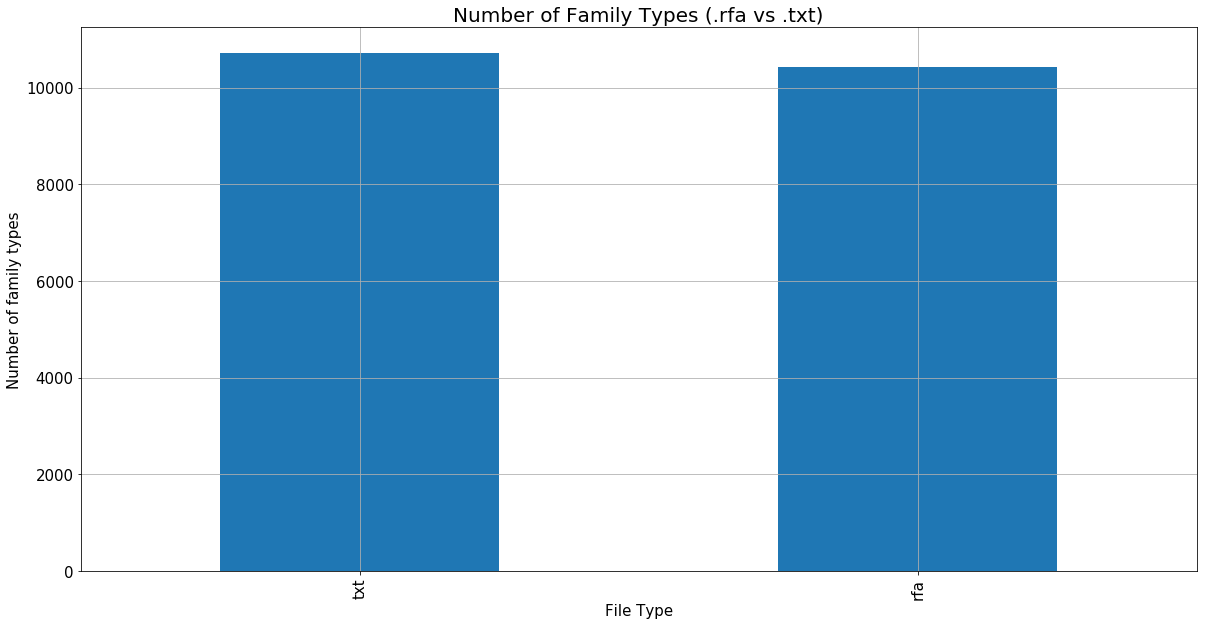

In [14]:
fileType_counts.plot(kind="bar", grid=True, fontsize=15)
plt.title("Number of Family Types (.rfa vs .txt)", fontsize=20)
plt.xlabel("File Type", fontsize=15)
plt.ylabel("Number of family types", fontsize=15)
plt.show()

### No. of Family Types for native .rfa families

<b>rfaType_counts</b> counts the number of family types within the native rfa family.

In [15]:
rfaType_counts = ft_noTxt[["FamilyName","FamilyTypeName"]].groupby("FamilyName").agg("count")

rfaType_counts.head()

,FamilyTypeName
FamilyName,
1 Bay Window,2
1 Bay Window - Non Hosted,1
10P_Perimeter_Bench_FYS,1
115_BVNDH_WC Cubicle,3
12P_Meeting_FYS,1


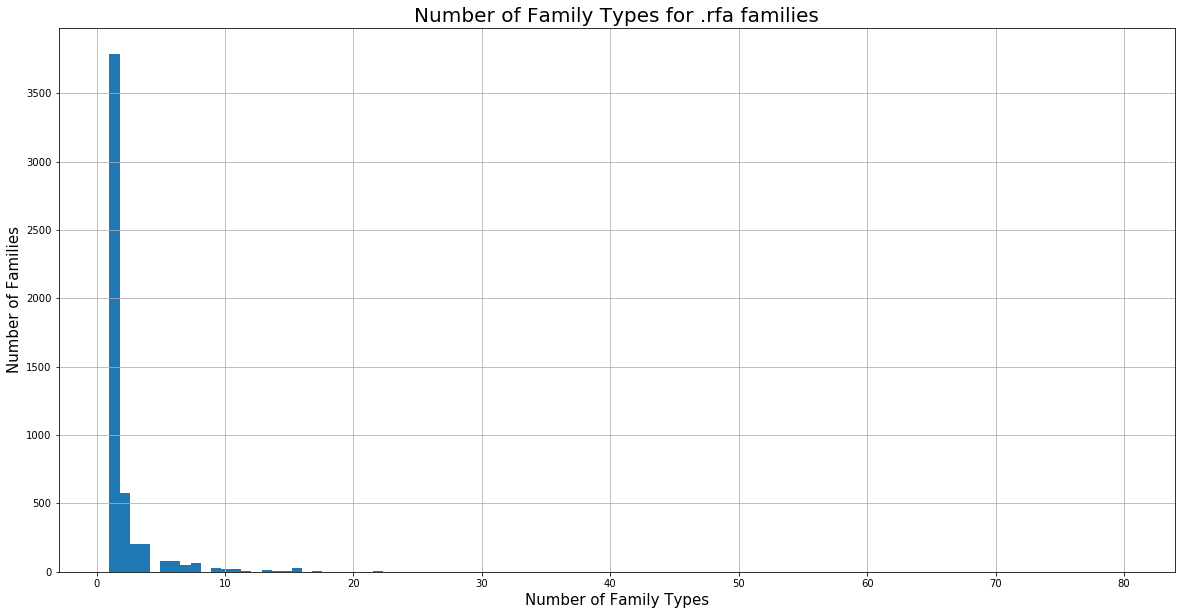

In [16]:
rfaType_counts.hist(bins=100)
plt.title("Number of Family Types for .rfa families", fontsize=20)
plt.xlabel("Number of Family Types", fontsize=15)
plt.ylabel("Number of Families", fontsize=15)

### No. of Family Types for native .rfa families (Worst Offenders)

In [17]:
rfaType_counts[rfaType_counts.FamilyTypeName>50]

,FamilyTypeName
FamilyName,
Timber Stud_Section_DCO,80
Weights equipment_SEQ,67


### No. of Family Types from .txt files

In [18]:
txtType_counts = ft_hasTxt[["FamilyName","FamilyTypeName"]].groupby("FamilyName").agg("count")

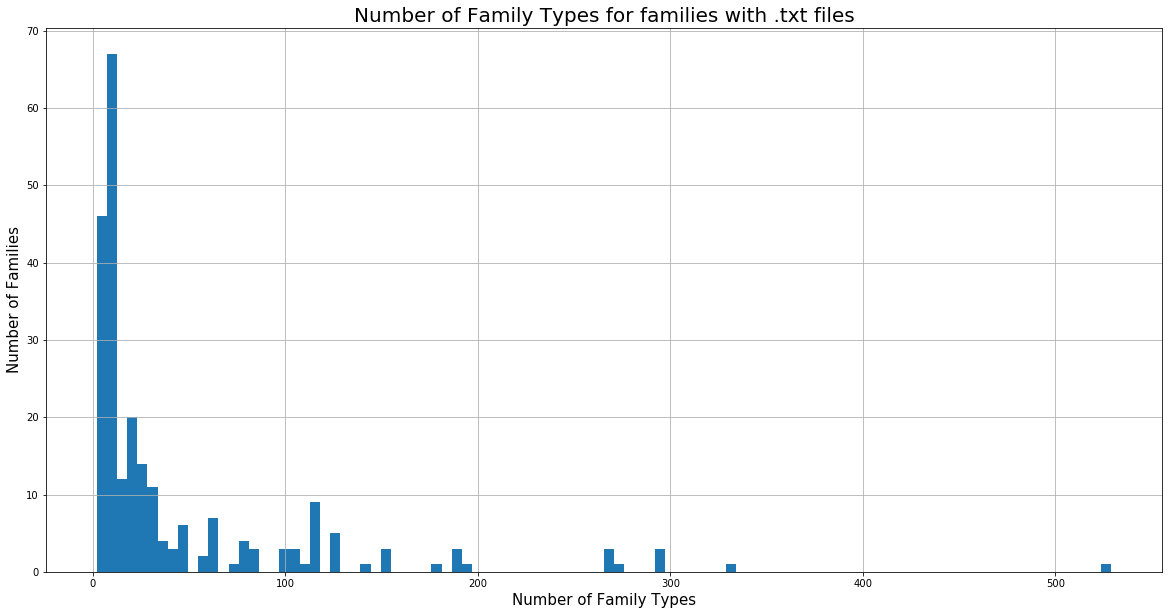

In [19]:
txtType_counts.hist(bins=100)
plt.title("Number of Family Types for families with .txt files", fontsize=20)
plt.xlabel("Number of Family Types", fontsize=15)
plt.ylabel("Number of Families", fontsize=15)
plt.show()

### No. of Family Types from .txt files > 200

In [20]:
txtType_counts[txtType_counts.FamilyTypeName>200]

,FamilyTypeName
FamilyName,
CISC Wide Flange Shapes_Section,294
CISC Wide Flange Shapes_Side,294
CISC Wide Flange Shapes_Top,294
HSS_Hollow Structural Section_Pro,333
Supply Diffuser_Sidewall,529
WT_Structural Tee,267
WT_Structural Tee_Pro,267
W_Wide Flange,274
W_Wide Flange_Pro,267


### ***REVISIT***

In [21]:
def has_txt_catalogue(row):
    """Checks to see if theres a txt file corresponding to this family
    
    Very slow, needs work at some point
    """
    return ft[(ft.fileType=="txt") & (ft.FamilyName==row.FamilyName)].shape[0]

ft_noTxt["catalogueSize"] = ft_noTxt.apply(has_txt_catalogue, axis=1)
ft_noTxt.head()

Q:\Users\arivera\AppData\Local\Continuum\Anaconda2\lib\site-packages\ipykernel\__main__.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,FamilyFilePath,FamilyName,FamilyTypeName,fileType,catalogueSize
0,Windows\Special,Window Round_basic,,rfa,0
1,Windows\Special,Window Lancet_basic,,rfa,0
2,Windows\Special,Window Arched Top_basic,,rfa,0
3,Windows\Special,Skylight_Velux_FCM_WIN,,rfa,0
4,Windows\Special,Skylight_Operable_WIN,600 x 600mm,rfa,0


In [22]:
ft_noTxt.shape

(10436, 5)